In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
#cr_filtering()
#cr_read_norm()1dasdas
import h5py
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
n_obs=1000 #number of observations per timepoint


In [2]:
adata = read_liver_data_2(n_obs=n_obs) #read data
adata = sort_data_crit(adata=copy.deepcopy(adata.copy()),crit='ZT',crit_list=['0','6','12','18']) #sort the data according to the timepoints
adata

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/l

View of AnnData object with n_obs × n_vars = 4000 × 14812
    obs: 'ZT', 'layer', 'batch'

In [3]:


#standard pre-processing
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=7000)
orig_adata = copy.deepcopy(adata.copy())



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


7000
1


/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:653: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  tmp_value, grad = fAndG_full(A=A, B=F, V=V, alpha=regu, regu_norm=regu_norm)
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:653: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  tmp_value, grad = fAndG_full(A=A, B=F, V=V, alpha=regu, regu_norm=regu_norm)
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:653: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  tmp_value, grad = fAndG_full(A=A, B=F, V=V, alpha=regu, regu_norm=regu_norm)


(4000, 7000)
(4000, 7000)
(4000, 3999)
Iteration number: 1
         Falling back to preprocessing with `sc.pp.pca` and default params.


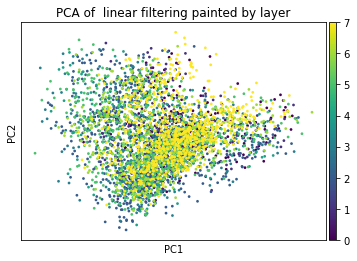

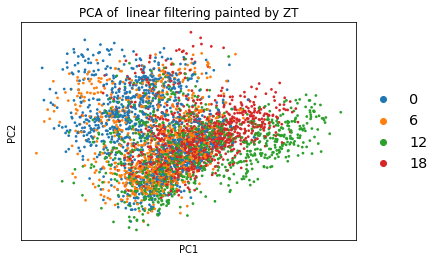

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


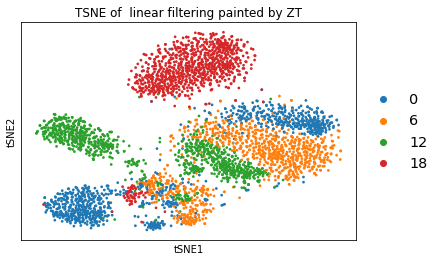

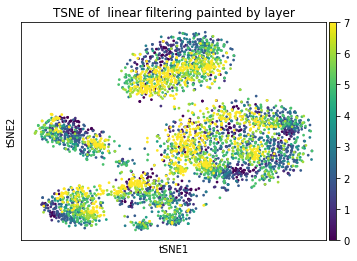

Norm change: 395.62119825375703


In [5]:
#linear filtering
linear_adata = copy.deepcopy(orig_adata.copy())
linear_adata = shuffle_adata(linear_adata)
linear_adata = sort_data_linear(linear_adata)
adata_linear_filtered = copy.deepcopy(linear_adata.copy())
F1 = filter_linear_full(adata_linear_filtered.X, regu=0.1 , regu_norm='L1' , iterNum=100 , method= 'numeric')
adata_linear_filtered.X = adata_linear_filtered.X * F1
plots_liver(adata_linear_filtered,title=" linear filtering")
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_filtered.X)))


starting filtering
25
th Iteration    Loss :: 
2208.325680392
50
th Iteration    Loss :: 
1116.05909663733
75
th Iteration    Loss :: 
798.3418627288117
100
th Iteration    Loss :: 
592.2455282941121
125
th Iteration    Loss :: 
514.4500817372355
150
th Iteration    Loss :: 
405.3356600844644
175
th Iteration    Loss :: 
361.7933053376131
200
th Iteration    Loss :: 
332.6256569155177
225
th Iteration    Loss :: 
287.6793326507476
250
th Iteration    Loss :: 
266.41525564969896
275
th Iteration    Loss :: 
248.81691988106755
300
th Iteration    Loss :: 
231.78160689360578
         Falling back to preprocessing with `sc.pp.pca` and default params.


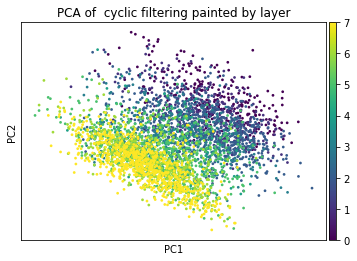

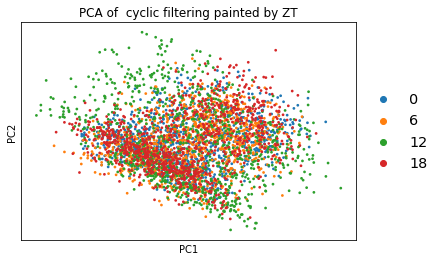

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


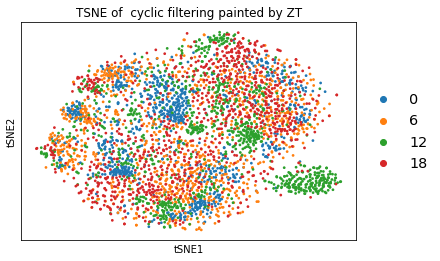

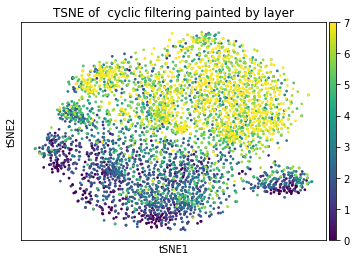

Norm change: 705.7114442448947


In [6]:
#cyclic filtering
adata_cyclic_filtered = copy.deepcopy(orig_adata.copy())
F = filtering_cyclic(adata_cyclic_filtered.X, regu=0, iterNum=300, verbosity=25)
adata_cyclic_filtered.X = adata_cyclic_filtered.X * F
plots_liver(adata_cyclic_filtered,title=" cyclic filtering")
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_filtered.X)))


/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:394: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  ATUUTA = (2 * ((((A.T).dot(U)).dot(U.T)).dot(A)))


25
th Iteration    Loss :: 
1908.5771638856415
 gradient :: 
18.133082471220202
50
th Iteration    Loss :: 
1908.3220655550479
 gradient :: 
18.132553145052917


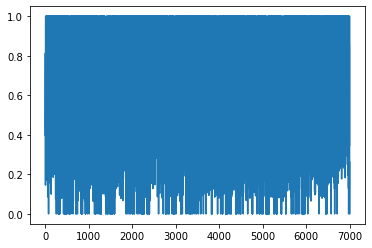

Iteration number: 
1
function value: 
37155.22332057044


/Users/jonathankarin/PycharmProjects/scPrisma_rev/visualizations.py:524: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(adata)


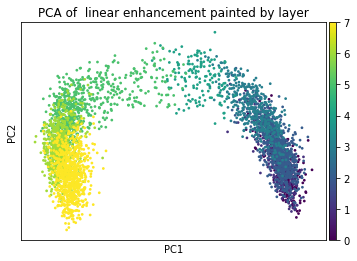

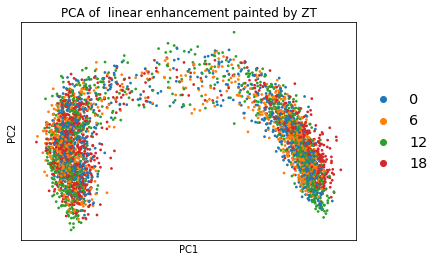

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


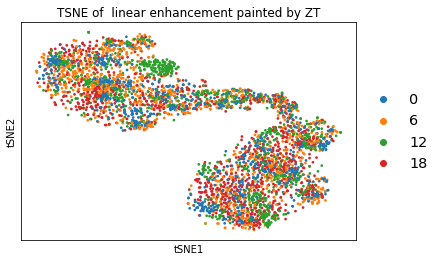

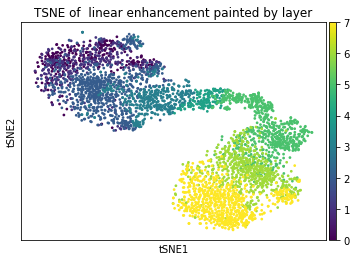

In [7]:
adata_cyclic_filtered_for_linear = copy.deepcopy(adata_cyclic_filtered.copy())
adata_cyclic_filtered_for_linear = sort_data_linear(adata_cyclic_filtered_for_linear)

D = filter_linear_genes_line((np.array(adata_cyclic_filtered_for_linear.X)).astype('float64'),regu=1,method='numeric' , iterNum=50) #0.5
D1 = np.identity(D.shape[0])-D
plt.plot(range(7000),D.diagonal())
plt.show()

adata_cyclic_filtered_for_linear.X = adata_cyclic_filtered_for_linear.X.dot(D1)
F_en = enhancement_linear((np.array(adata_cyclic_filtered_for_linear.X)).astype('float64'), regu=-0.05, iterNum=10 , method='numeric') # -0.01
adata_cyclic_filtered_for_linear.X = adata_cyclic_filtered_for_linear.X * F_en
plots_liver(adata_cyclic_filtered_for_linear,title=" linear enhancement")


25
th Iteration    Loss :: 
1904.0652387907157
 gradient :: 
21.363564147935122
Iteration number: 
1
function value: 
37344.57434032659
Iteration number: 
26
function value: 
261278.13462657452
Iteration number: 
51
function value: 
284090.9881514493
Iteration number: 
76
function value: 
291702.86204079085


/Users/jonathankarin/PycharmProjects/scPrisma_rev/visualizations.py:524: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(adata)


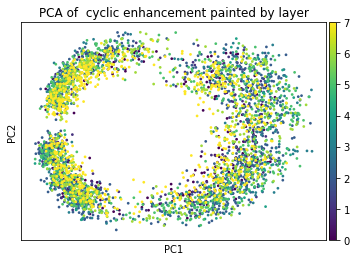

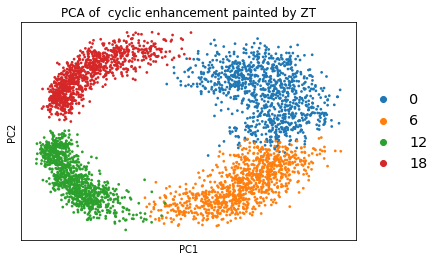

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


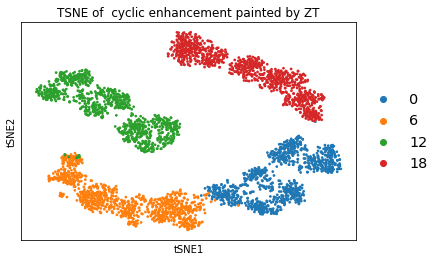

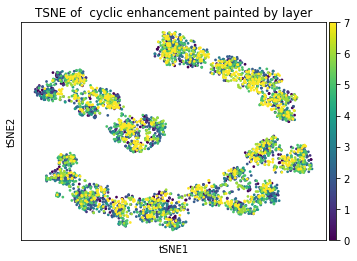

In [8]:

adata_linear_filtered_for_cyclic = copy.deepcopy(adata_linear_filtered.copy())
adata_linear_filtered_for_cyclic = sort_data_crit(adata=copy.deepcopy(adata_linear_filtered_for_cyclic.copy()),crit='ZT',crit_list=['0','6','12','18']) #sort the data according to the timepoints
D = filter_non_cyclic_genes_line((np.array(adata_linear_filtered_for_cyclic.X)).astype('float64'), regu=1,iterNum=25)
adata_linear_filtered_for_cyclic.X = adata_linear_filtered_for_cyclic.X.dot(D) 
F =enhancement_cyclic((np.array(adata_linear_filtered_for_cyclic.X)).astype('float64'), regu=0.01 ,iterNum=100)
adata_linear_filtered_for_cyclic.X = adata_linear_filtered_for_cyclic.X * F
plots_liver(adata_linear_filtered_for_cyclic,title=" cyclic enhancement")


In [9]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(adata_cyclic_filtered_for_linear.X)
print(adjusted_rand_score(kmeans.labels_ , adata_cyclic_filtered_for_linear.obs['layer']))
adata_cyclic_enhancment_kmeans_8 = (adjusted_rand_score(kmeans.labels_ , adata_cyclic_filtered_for_linear.obs['layer']))

 

kmeans = KMeans(n_clusters=4, random_state=0).fit(adata_cyclic_filtered_for_linear.X)
print(adjusted_rand_score(kmeans.labels_ , adata_cyclic_filtered_for_linear.obs['ZT']))
alinear_kmeans = (adjusted_rand_score(kmeans.labels_ , adata_cyclic_filtered_for_linear.obs['ZT']))

kmeans = KMeans(n_clusters=8, random_state=0).fit(adata_linear_filtered_for_cyclic.X)
print(adjusted_rand_score(kmeans.labels_ , adata_linear_filtered_for_cyclic.obs['layer']))

 

kmeans = KMeans(n_clusters=4, random_state=0).fit(adata_linear_filtered_for_cyclic.X)
print(adjusted_rand_score(kmeans.labels_ , adata_linear_filtered_for_cyclic.obs['ZT']))
alinear_kmeans = (adjusted_rand_score(kmeans.labels_ , adata_linear_filtered_for_cyclic.obs['ZT']))


0.38718855820041875
0.005822951958366098
0.0033969041587348426
0.9563874072173686


25
th Iteration    Loss :: 
1848.1409251100329
 gradient :: 
17.076939119363935
50
th Iteration    Loss :: 
1846.6021524657158
 gradient :: 
17.07549317067062


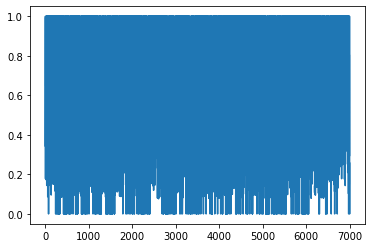

Iteration number: 
1
function value: 
43143.81629582174
         Falling back to preprocessing with `sc.pp.pca` and default params.


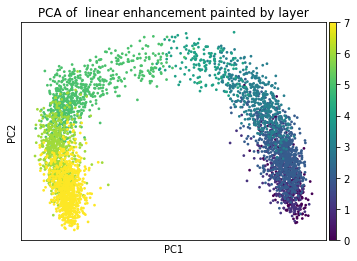

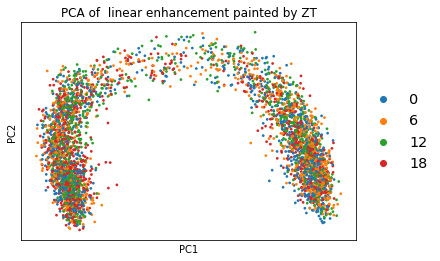

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


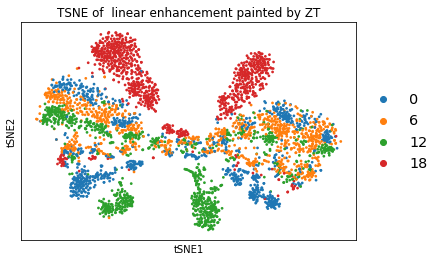

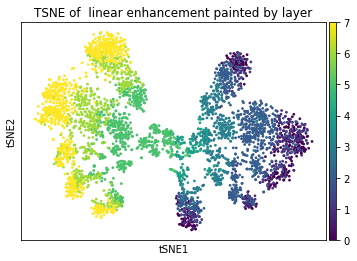

Norm change: 1362.6009552707562


In [10]:
adata_linear_enhanced = linear_adata.copy()

D = filter_linear_genes_line((np.array(adata_linear_enhanced.X)).astype('float64'),regu=1,method='numeric' , iterNum=50) #0.5
D1 = np.identity(D.shape[0])-D
plt.plot(range(7000),D.diagonal())
plt.show()

adata_linear_enhanced.X = adata_linear_enhanced.X.dot(D1)
F_en = enhancement_linear((np.array(adata_linear_enhanced.X)).astype('float64'), regu=-0.05, iterNum=10 , method='numeric') # -0.01
adata_linear_enhanced.X = adata_linear_enhanced.X * F_en
plots_liver(adata_linear_enhanced,title=" linear enhancement")
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_enhanced.X)))


25
th Iteration    Loss :: 
1892.9921069690788
 gradient :: 
21.752970538556955
Iteration number: 
1
function value: 
38747.2194427545
Iteration number: 
26
function value: 
267840.0222085327
Iteration number: 
51
function value: 
290813.9298075106
Iteration number: 
76
function value: 
298089.68173230765
         Falling back to preprocessing with `sc.pp.pca` and default params.


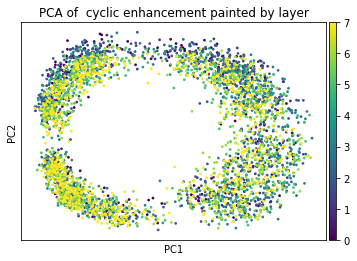

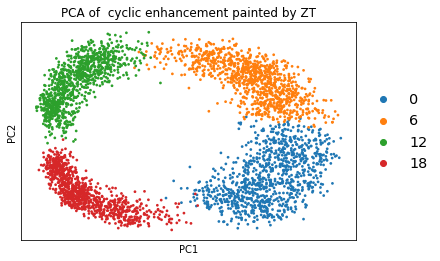

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


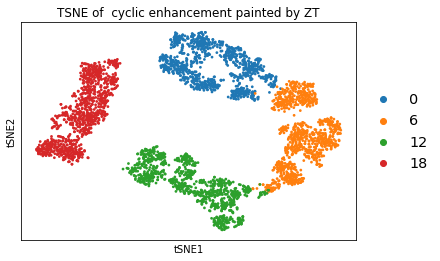

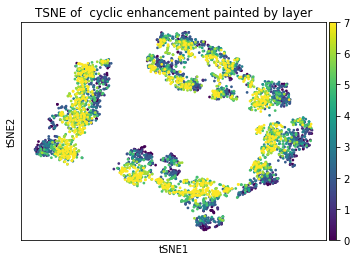

Norm change: 2110.7979899072498


In [11]:
adata_cyclic_enhancment = copy.deepcopy(orig_adata.copy())
D = filter_non_cyclic_genes_line((np.array(adata_cyclic_enhancment.X)).astype('float64'), regu=1,iterNum=25)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X.dot(D) 
F =enhancement_cyclic((np.array(adata_cyclic_enhancment.X)).astype('float64'), regu=0.01 ,iterNum=100)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X * F
plots_liver(adata_cyclic_enhancment,title=" cyclic enhancement")
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_enhancment.X)))


In [12]:
def plt_mean_heatmap_gene_liver_cyclic_enhancement(adata, adata_linear_filtered , adata_cyclic_enhancment , adata_linear_filtered_for_cyclic,gene ):
    data = np.array([get_mean_ct_gene_liver(adata,gene),
                    get_mean_ct_gene_liver(adata_linear_filtered,gene),
                    get_mean_ct_gene_liver(adata_cyclic_enhancment,gene),
                    get_mean_ct_gene_liver(adata_linear_filtered_for_cyclic,gene)])
    df = pd.DataFrame(data, index=
                ['Raw data','Linear filtered','Cyclic enhanced','Cyclic enhancement following linear filtering'], columns=['CT0','CT6','CT12','CT18'])
    ax = sns.heatmap(df, cmap='rocket_r').set(title= gene + " expression as a function of sampling CT")
    plt.tick_params(labelsize=14)
    plt.xlabel('Circadian timepoint', fontsize=14)

    #sns.set(font_scale=1.5)
    #ax.set_xlabel('Circadian timepoint')
    plt.show()
def plt_mean_heatmap_gene_liver_linear_enhancement(adata, adata_cyclic_filtered , adata_linear_enhancment , adata_cyclic_filtered_for_linear,gene ):

    data = np.array([get_mean_layer_gene_liver(adata,gene),
                    get_mean_layer_gene_liver(adata_cyclic_filtered,gene),
                    get_mean_layer_gene_liver(adata_linear_enhancment,gene),
                    get_mean_layer_gene_liver(adata_cyclic_filtered_for_linear,gene)])
    df = pd.DataFrame(data, index=
              ['Raw data','Cyclic filtered','Linear enhanced','Linear enhancement following cyclic linear filtering'], columns=range(8))
    ax = sns.heatmap(df , cmap='rocket_r').set(title= gene + " expression as a function of layer")
    plt.xlabel('Zonation layer', fontsize=14)
    plt.tick_params(labelsize=14)
    plt.show()


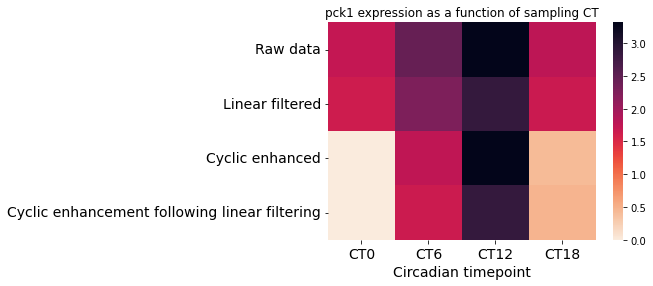

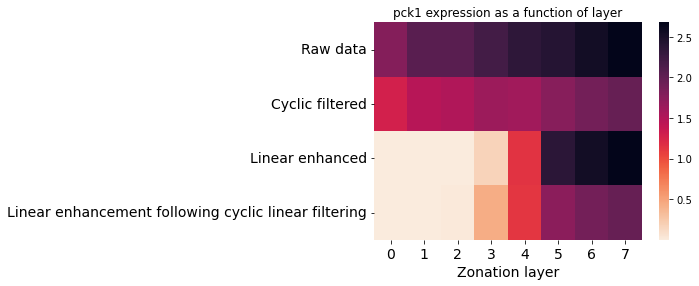

In [13]:
plt_mean_heatmap_gene_liver_cyclic_enhancement(adata,adata_linear_filtered,adata_cyclic_enhancment,adata_linear_filtered_for_cyclic,'pck1')
plt_mean_heatmap_gene_liver_linear_enhancement(adata,adata_cyclic_filtered,adata_linear_enhanced,adata_cyclic_filtered_for_linear,'pck1')
